# Please vote my notebook if you liked the work !
The notebook is still in progress !

# Table of Content
* [Context](#context)
* [Profiling season](#profile)
* [1. Let's start with Tableau](#tableau)
    * [age attendance for season](#attendance)
    * [grouping partecipant by employer category](#category)
    * [Donations in first healthcamp](#donations)
    * [Who share the most on social media](#social)

    

# **Context**<a id="context">

MedCamp organizes health camps in several cities with low work-life balance. They reach out to working people and ask them to register for these health camps. For those who attend, MedCamp provides them the facility to undergo health checks or increase awareness by visiting various stalls (depending on the format of the camp).

MedCamp has conducted 65 such events over a period of 4 years and they see a high drop off between “Registration” and the Number of people taking tests at the Camps. In the last 4 years, they have stored data of ~110,000 registrations they have done.

One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than the required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than the required inventory for conducting these medical checks, people end up having bad[](http://) experience.</a>

# Questions on this dataset :
1. Let's profile the attendant - what's the main group of ages that partecipates and which employeer category they belong to ?
2. If we profile the seasons in which the healthcamp has been launched, how does donation goes ?
3. Wanting to check the marketing campaign, which social media is used more for each LOI (level of income) ?

<a id="profile"> </a>
# Profiling the healthcamps with seasons 


In [ ]:
import datetime
from dateutil.rrule import rrule, MONTHLY

def list_months_in_date(start_date: datetime, end_date : datetime) -> list :
    strt_dt = datetime.datetime.strptime(start_date, "%d-%b-%y")
    end_dt = datetime.datetime.strptime(end_date, "%d-%b-%y")
    dates = [dt for dt in rrule(MONTHLY, dtstart=strt_dt, until=end_dt)]
    distinct_months = []
    months = [date.strftime("%B") for date in dates if date.strftime("%B") not in distinct_months]
    distinct_months = list(set(months))
    
    return distinct_months    

In [ ]:
import pandas as pd

df_med_camps = pd.read_csv("../input/healthcare-analytics/Train/Health_Camp_Detail.csv",sep=',',delimiter=',')
#Format dates with pandas
df_med_camps

In [ ]:
df_med_camps["Camp_Start_Date"] = pd.to_datetime(df_med_camps["Camp_Start_Date"], format="%d-%b-%y")
df_med_camps["Camp_End_Date"] = pd.to_datetime(df_med_camps["Camp_End_Date"], format="%d-%b-%y")

In [ ]:
#map the months with a dictionary and map
s = {6:"Summer", 7:"Summer", 8:"Summer", 9:"Autumn", 10: "Autumn",11:"Autumn",12:"Winter",1:"Winter",2:"Winter",3:"Spring",4:"Spring",5:"Spring"} 
df_med_camps["label"] = df_med_camps.filter(like="Date").apply(lambda d: d.dt.month.map(s)).agg(",".join, axis=1)
df_med_camps

In [ ]:
#remove duplicates in label (seasons)
new_season = list(df_med_camps.label.str.split(","))
new_season

In [ ]:
new_seasons2 = [str((set(season))).replace('{','').replace("'",'').replace('}','') for season in new_season]
type(new_seasons2)
df_med_camps['label'] = new_seasons2

In [ ]:
df_med_camps.to_csv('Health_Camp_details_season.csv', encoding='utf-8',index=False)

# Let's start with Tableau <a id="tableau">

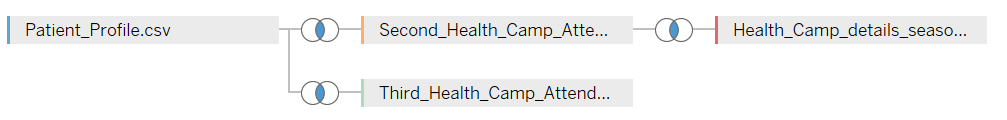</a>


By linking patient profile with second and third healthcamp and health camp details <a id ="attendance"></a>

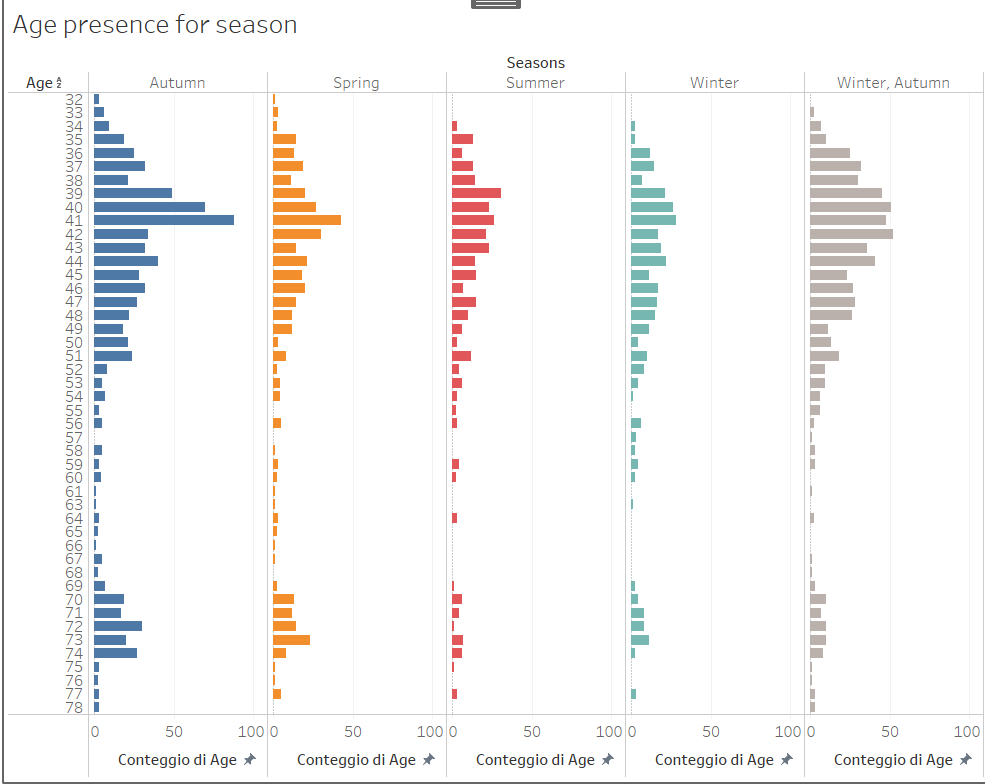


We can consider that for 2nd,3rd healthcamp:
* In autumn Season, range of age who attended the healthcamps was 32-52 plus a group of 70-74
* In spring Season, range of age who attended the healthcamps was 34-49 plus a group of 70-74
* In Summer Season, range of age who attended the healthcamps was 34-51 plus a group of 70-74
* The healthcamps who lasted in summer and winter, the group was 34-52 plus a group of 70-74
* the group of age from 60 to 69 in 2nd and 3rd healthcamps in Summer/Winter/Autumn were very low as attendance

# Partecipant by employee category
<a id ="category"></a>
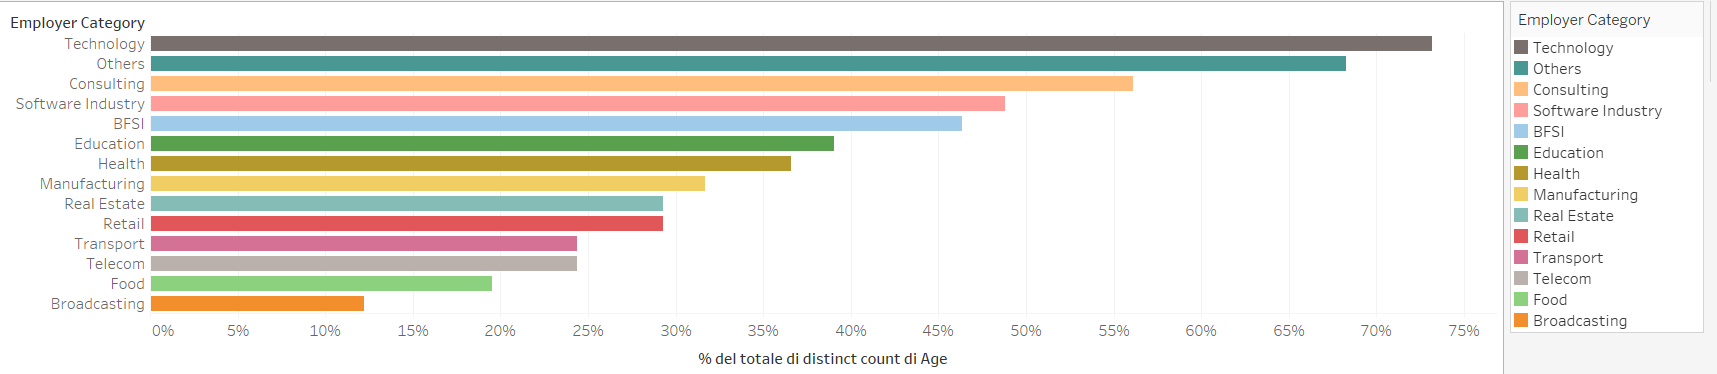


Analyzing attendance in relation to employer category, we can find 6 top categories :
* Technology (73%)
* Others     (68%)
* Consulting (57%)
* Software Industry (48%)
* Banking, Finances and services, Insurance (46%)
* Education (38%)

Or looking it as a Heatmap :

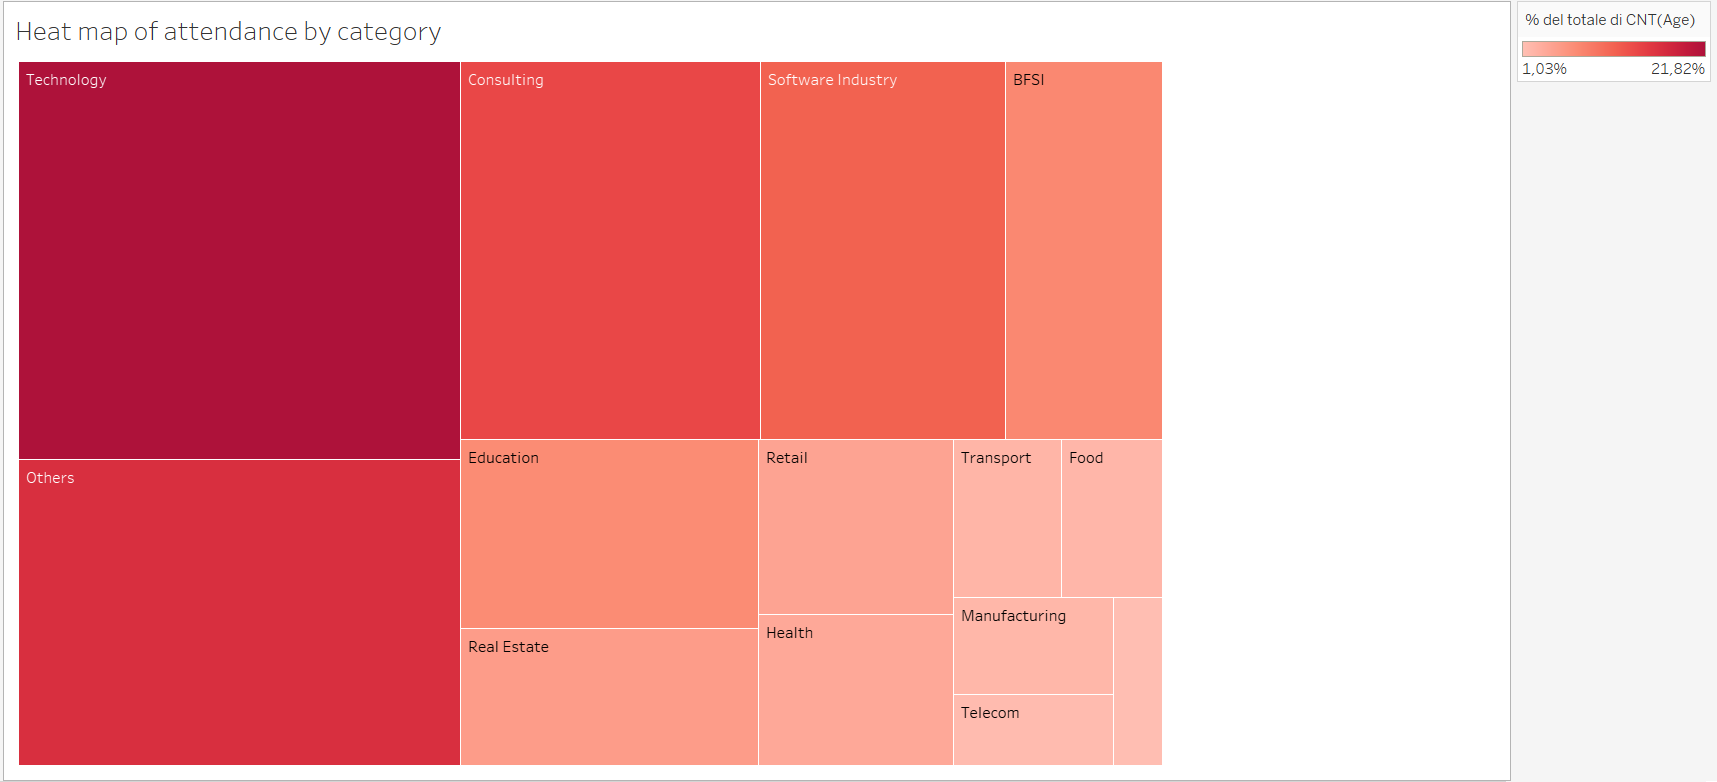

<a id="donations"></a>

# If we focus on the donations from first healthcamp
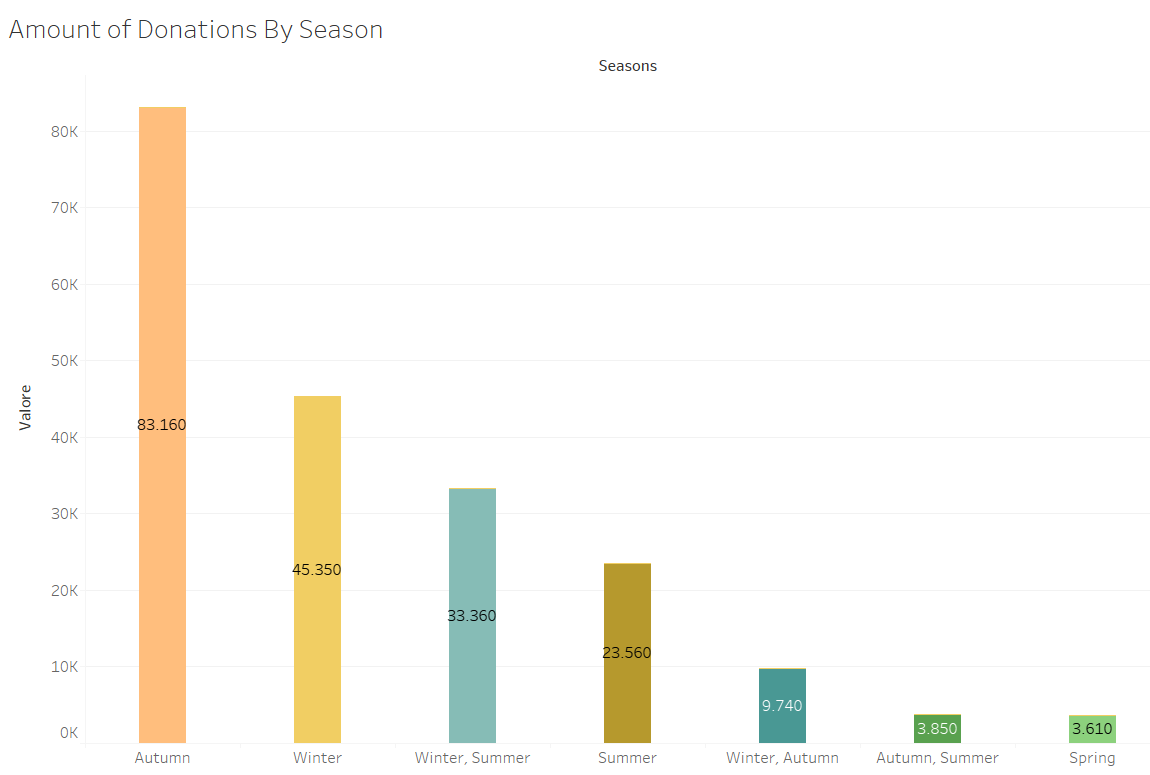

* For season Autumn and Winter, if healthcamp last only one season, donations are higher
  if healthcamps last more than one seasons, donations drops of -75%
* For season summer, if healthcamp is held from winter to summer, donation drop to 34% related to donations in summer and winter
* For season spring, donations are very low
* If healthcamp is held from Autumn to Summer, we earn -96% donations less

# Who shares the most on social media ? <a id ="social"></a>
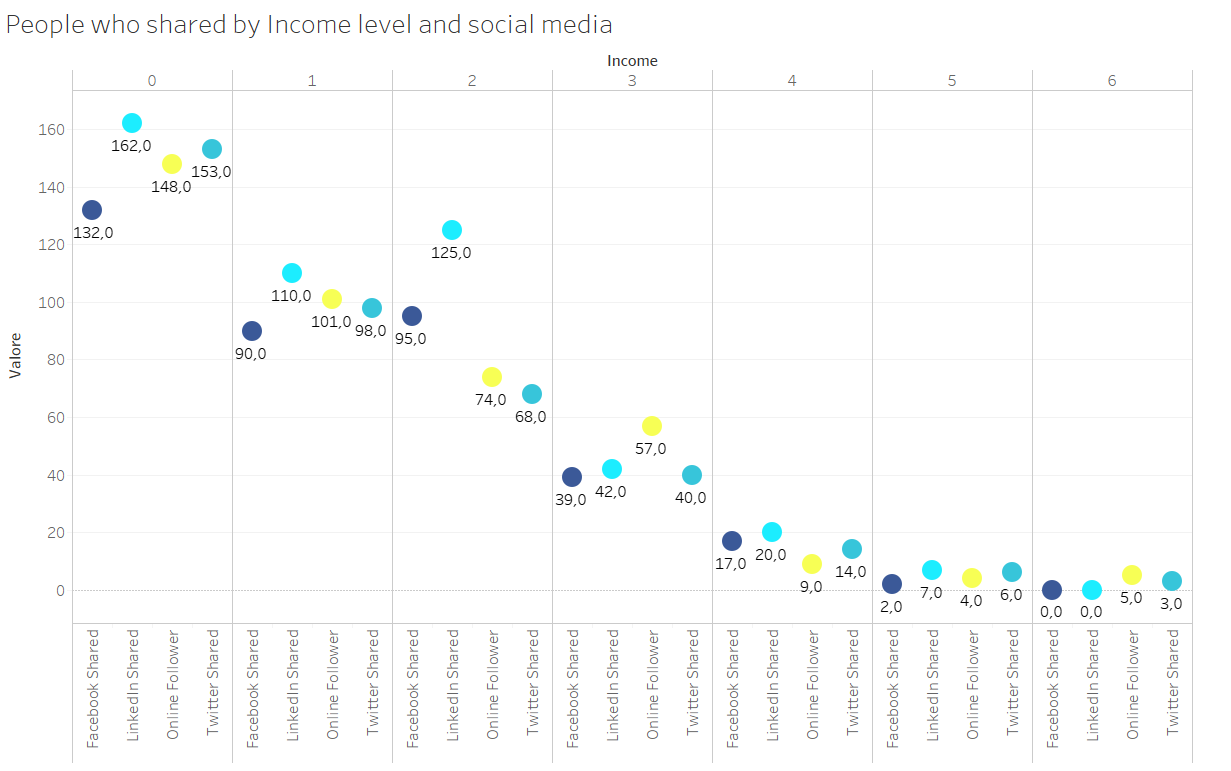

We can see that for the 6 levels of income, 

* In first 3 tiers, Linkedin is preferited social media, followed by online site news and facebook
* From tier 4 to 6, we cannot say too much due to drop of data, but Facebook,Linkedin and Online feeds remains the favorites